In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('training_data.csv')

In [3]:
print(f"total record: {data.shape[0]}")
print(f"total feature: {data.shape[1]}")

total record: 7043
total feature: 22


### Walkthrough the dataset before analysis

In [4]:
data.head()

,_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,65a0b147a353b547c2a85e79,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
1,65a0b147a353b547c2a85e7f,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
2,65a0b147a353b547c2a85e72,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,65a0b147a353b547c2a85e8c,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
4,65a0b147a353b547c2a85e8b,6865-JZNKO,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.30,1530.6,No


In [5]:
data.tail()

,_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,65a0b147a353b547c2a879a1,1024-KPRBB,Female,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Mailed check,89.10,3342,No
7039,65a0b147a353b547c2a879ae,6664-FPDAC,Female,1,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.9,Yes
7040,65a0b147a353b547c2a879c6,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes
7041,65a0b147a353b547c2a879e8,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7042,65a0b147a353b547c2a879f0,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               7043 non-null   object 
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [7]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('O')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               7043 non-null   object 
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [9]:
numerical_columns = data.select_dtypes(include=['int','float64']).columns.tolist()
print(f"numerical columns: {numerical_columns}")

numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(f"categorical columns: {categorical_columns}")

categorical columns: ['_id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Target Feature

In [12]:
print(f"target feature is: 'Churn'")
print(f"unique values in target feature: {data['Churn'].unique()}")
print(f"unique value count in target feature: {len(data['Churn'].unique())}")

target feature is: 'Churn'
unique values in target feature: ['No' 'Yes']
unique value count in target feature: 2


### Observation:
* It's binary classification business statement
* it's in categorical for, need to transform

In [13]:
summary_stats = data[numerical_columns].describe()
summary_stats

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [21]:
data[data['tenure']==0]

,_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
53,65a0b147a353b547c2a8605a,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
758,65a0b147a353b547c2a8621a,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
828,65a0b147a353b547c2a86163,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2611,65a0b147a353b547c2a862ac,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
2883,65a0b147a353b547c2a86f8e,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
3192,65a0b147a353b547c2a872d4,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3595,65a0b147a353b547c2a863ae,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4041,65a0b147a353b547c2a86b75,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4389,65a0b147a353b547c2a86d64,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6177,65a0b147a353b547c2a87880,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
len(data[data['tenure']==0])

11

### STEP : 2 - Data Visualization

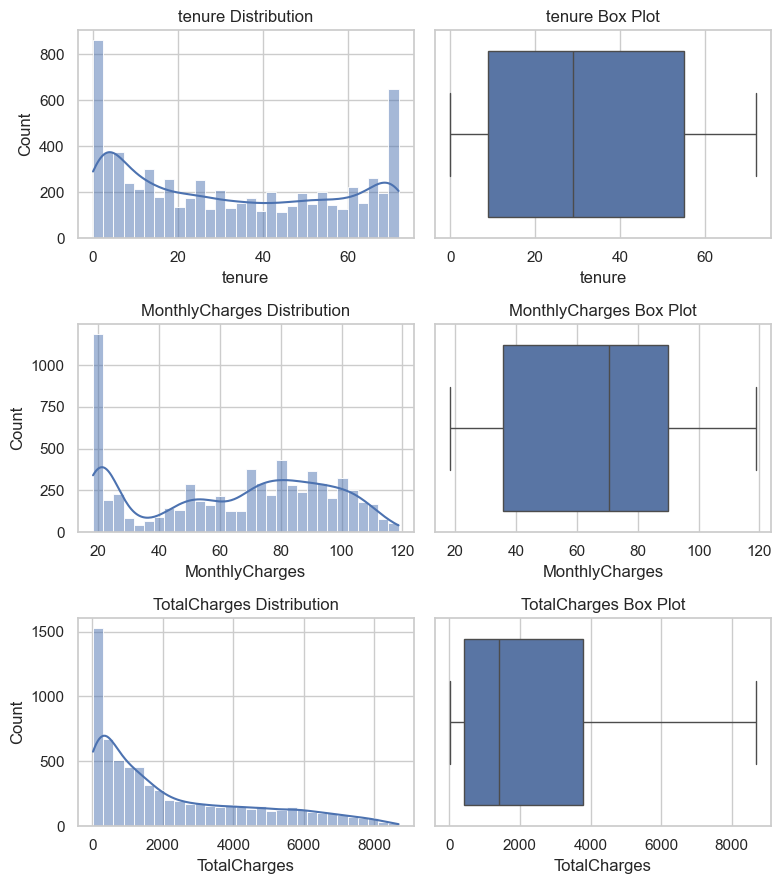

In [16]:
sns.set(style = 'whitegrid')

fig, axes = plt.subplots(nrows = len(numerical_columns), ncols = 2, figsize = (8, 3*len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde = True, ax=axes[i,0], bins = 30)
    axes[i,0].set_title(f'{col} Distribution')

    sns.boxplot(x = col, data = data, ax= axes[i,1])
    axes[i,1].set_title(f'{col} Box Plot')

plt.tight_layout()

plt.show()

In [17]:
pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\admin\appdata\local\programs\python\python310\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Step 3 - Correlation Analysis

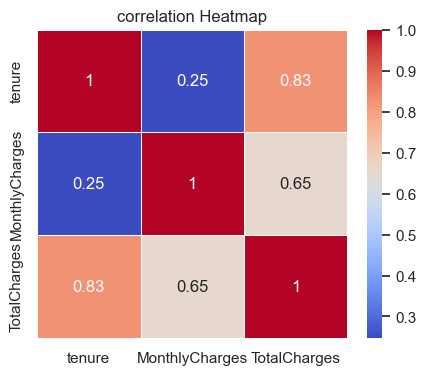

In [19]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize = (5,4))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.5)

plt.title('correlation Heatmap')

plt.show()

In [20]:
correlation_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000
